<a href="https://colab.research.google.com/github/nathsmo/Elements-of-ML/blob/master/Laboratorio_5_EoML_Nathalia_Morales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 5

En este laboratorio aprenderemos a aplicar validación cruzada de k-folios.

In [0]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels
import statsmodels.formula.api as smf

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

print("Todos los paquetes han sido importados.")

Todos los paquetes han sido importados.


## Validación cruzada

Es un procedimiento que evalúa las habilidades predictivas de un modelo en una muestra limitada. El procedimiento general es

1.   Reordenar la muestra aleatoriamente
2.   Separar el dataset en k grupos
3.   Tomar k-1 grupos como datos de entrenamiento y el otro como grupo de validación
4.   Entrenar un modelo sobre uno de los grupos de entrenamiento
5.   Evaluar el modelo sobre el grupo restante correspondiente, el grupo de validación
6.   Guardar alguna medida de habilidad del modelo y descartar el modelo
7.   Repetir 4 a 6 tomando un nuevo split

Cualquier preparación de los datos debe aplicarse entre los pasos 2 y 3, no antes. De lo contrario, se estará sobreestimando las habilidades de los modelos (como descrito en la sección 7.10.2 del libro "The elements of machine learning")



### Cómo separar un grupo de datos

Imagina que tenemos una muestra de 6 observaciones

In [0]:
data = np.array([1,2,3,4,5,6])
kfold = KFold(3,True,1) #Recuerda que puedes revisar la documentación de nuevas funciones usando Tab luego del primer paréntesis
splitdata = kfold.split(data) # Esta función genera listas de índices separadas como indicado
for train, test in splitdata:
  # imprimo en la línea 'split' los índices train y test que generó kfold.split
  print('split %s, %s\ntrain: %s, test: %s' % (train,test,data[train], data[test]))

split [0 3 4 5], [1 2]
train: [1 4 5 6], test: [2 3]
split [1 2 3 5], [0 4]
train: [2 3 4 6], test: [1 5]
split [0 1 2 4], [3 5]
train: [1 2 3 5], test: [4 6]


kfold.split separó los datos como esperado. Cada una de las observaciones aparece k-1 veces como parte de un grupo de entrenamiento y 1 vez como parte del grupo de validación. Para aplicar esto a observaciones con un target, simplemente lo colocamos también en el argumento de kfold.split:

In [0]:
data = np.array(([1,2,3,4,5,6],[10,20,30,40,50,60]))
kfold = KFold(3,True,1)
splitdata = kfold.split(X = data[0], y = data[1])
for train, test in splitdata:
  print('split %s, %s\ntrain x: %s, test x: %s' % (train,test,data[0][train], data[0][test]))
  print('train y: %s, test y: %s' % (data[1][train], data[1][test]))

split [0 3 4 5], [1 2]
train x: [1 4 5 6], test x: [2 3]
train y: [10 40 50 60], test y: [20 30]
split [1 2 3 5], [0 4]
train x: [2 3 4 6], test x: [1 5]
train y: [20 30 40 60], test y: [10 50]
split [0 1 2 4], [3 5]
train x: [1 2 3 5], test x: [4 6]
train y: [10 20 30 50], test y: [40 60]


### Aplicación completa del procedimiento CV
Ahora, para cada split entremos algún modelo y evaluamos en su grupo respectivo. Usaré una regresión logística (no muy astuto, eh?)

In [0]:
data = np.array(([1,2,3,4,5,6],[0.1,0.2,0.3,0.4,0.5,0.6]))
# Pasos 1 y 2 ocurren en la siguiente línea
kfold = KFold(3,True,1)
# Paso 3 ocurre al usar split
splitdata = kfold.split(X = data[0], y = data[1])
RMSE_i = [] # Aquí es donde guardaré mi medida de varianza para cada modelo
for train, test in splitdata:
  # 4. Ajustar una regresión logística en un grupo de entrenamiento
  model = smf.Logit(data[1][train], data[0][train]).fit()
  # 5. Evaluar en el grupo de entrenamiento
  y_hat = model.predict(data[0][test])
  # 6. Guardar una medida de habilidad del modelo
  RMSE_i.append((sum((y_hat - data[1][test])**2)/len(y_hat))**(1/2))
  # Al repetir el loop, descartamos el modelo y repetimos los pasos para otro split
  
RMSE = np.mean(RMSE_i)
print(RMSE)

Optimization terminated successfully.
         Current function value: 0.692643
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.678234
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.627815
         Iterations 4
0.2562016989481721


### Ejercicio

Haz el mismo procedimiento que hicimos con la regresión logística, solo que ahora con una regresión lineal. Compara los RMSE

In [0]:
lm = LinearRegression()

data = np.array(([1,2,3,4,5,6],[0.1,0.2,0.3,0.4,0.5,0.6]))
# Pasos 1 y 2 ocurren en la siguiente línea
kfold = KFold(3,True,1)
# Paso 3 ocurre al usar split
splitdata = kfold.split(X = data[0], y = data[1])
RMSE_i = [] # Aquí es donde guardaré mi medida de varianza para cada modelo
i = 0

for train, test in splitdata:
  
  X_train = data[0][train]
  X_train = X_train.reshape(-1,1)
  y_train = data[1][train]
  y_train = y_train.reshape(-1,1)

  model = lm.fit(X =X_train, y=y_train)
  X_test = data[0][test]
  X_test = X_test.reshape(-1,1)
  y_hat = model.predict(X_test)
  y_test = data[1][test]
  y_test = y_test.reshape(-1,1)
  RMSE_i.append((sum((y_hat - y_test)**2)/len(y_hat))**(1/2))

RMSE = np.mean(RMSE_i)
print('RMSE:',RMSE)

RMSE: 5.887846720064156e-17


## Ejercicio de aplicación

Utiliza los datos de Iris (los del laboratorio 2) para investigar la dependencia de la varianza () con el valor k al hacer el procedimiento de validación cruzada. Como resultado, debes presentar una gráfica de RMSE contra k de por lo menos 10 diferentes valores de k.


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=3)
iris = load_iris()
data = iris.data
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
model = knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [0]:
model.score(X_test, y_test) 

0.9333333333333333

In [0]:
knn = KNeighborsClassifier(n_neighbors=5)
All_RMSE = []
for i in range(2,24,2):
  X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=36)
  kf = KFold(n_splits=i, shuffle=True)
  splitdata = kf.split(iris.data, iris.target)
  RMSE_i = []
  i = 0

  for train, test in splitdata:
    X_train = data[train]
    y_train = iris.target[train]

    model = knn.fit(X_train, y_train)
    X_test = data[test]
    y_hat = model.predict(X_test)
    y_test = iris.target[test]
    RMSE_i.append((sum((y_hat - y_test)**2)/len(y_hat))**(1/2))

  RMSE = np.mean(RMSE_i)
  print('RMSE:',RMSE)
  All_RMSE.append(RMSE)


RMSE: 0.2
RMSE: 0.20979736298894613
RMSE: 0.12761423749153966
RMSE: 0.12769756686812733
RMSE: 0.15491933384829665
RMSE: 0.08024570722409101
RMSE: 0.10191192868574174
RMSE: 0.0893817517614664
RMSE: 0.09820927516479827
RMSE: 0.09327056413150914
RMSE: 0.07583708649329685


range(2, 24, 2)


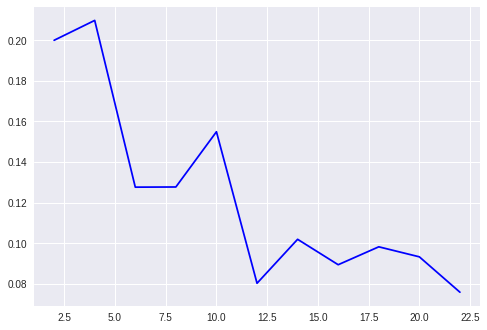

In [0]:
import matplotlib.pyplot as plt
numbers = range(2,24,2)
print(numbers)
plt.plot(numbers, All_RMSE, 'blue')
plt.axis()
plt.show()
